In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import thinkstats2
import thinkplot

In [3]:
saffronart_df = pd.read_csv('saffronart_dataset.csv') 

# change the dates to Pandas datetime objects:
saffronart_df['auction_date'] = pd.to_datetime(saffronart_df['auction_date'])
saffronart_df['birth_date'] = pd.to_datetime(saffronart_df['auction_date'])
saffronart_df['death_date'] = pd.to_datetime(saffronart_df['auction_date'])

saffronart_df.head(5)

,artist,birth_date,birth_place,death_date,artist_age,title,winning_bid,low_est,high_est,auction_date,category,style,size,medium
0,akhilesh,2019-06-01,Indore,2019-06-01,63.0,Divine Conversation,9000.0,5000.0,7000.0,2019-06-01,painting,abstract,71.5 x 71.5 in,acrylic on canvas
1,akhilesh,2013-11-01,Indore,2013-11-01,63.0,In search of Untitled forms -II,1120.0,5000.0,6670.0,2013-11-01,painting,abstract,32.5 x 44 in,acrylic on canvas
2,akhilesh,2013-08-01,Indore,2013-08-01,63.0,In Search of Untitled Lines,6186.0,6900.0,8625.0,2013-08-01,painting,NaN,47 x 47 in,acrylic on canvas
3,akhilesh,2013-02-01,Indore,2013-02-01,63.0,Magadhi,2400.0,5770.0,7695.0,2013-02-01,painting,abstract,33 x 44.5 in,acrylic on canvas
4,akhilesh,2013-02-01,Indore,2013-02-01,63.0,Untitled,2942.0,6735.0,8655.0,2013-02-01,painting,abstract,40 x 40 in,acrylic on canvas


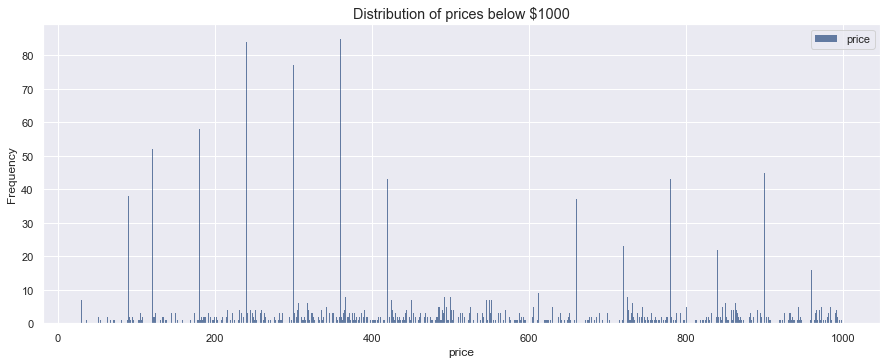

<Figure size 576x432 with 0 Axes>

In [31]:
# Histogram for prices below $1000

low_price = saffronart_df[saffronart_df.winning_bid < 1000]

low_price_hist = thinkstats2.Hist(low_price.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.title('Histogram of prices below $1000', fontsize = 'x-large')
thinkplot.Hist(low_price_hist)
thinkplot.Show(xlabel='price', ylabel='Frequency')

#### Comment:
The histogram above shows the distribution of prices below $1000. We can see that even within such a small interval, there're still so many random noises. Histogram, therefore, is not a good way of showing the overall distribution.

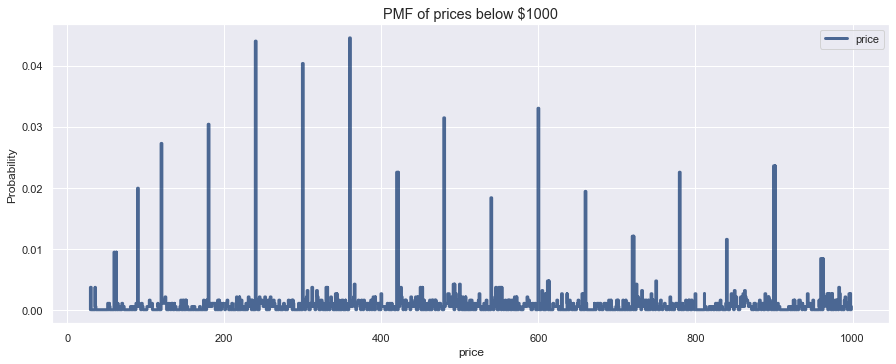

<Figure size 576x432 with 0 Axes>

In [34]:
# Probability Mass Function of prices below $1000:

low_price_pmf = thinkstats2.Pmf(low_price.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.title("PMF of prices below $1000", fontsize = 'x-large')
thinkplot.Pmf(low_price_pmf)
thinkplot.Show(xlabel='price', ylabel='Probability') 

#### Comment:
Another way of representing distributions is the Probability Mass Function (PMF). The graph above shows the distribution of prices below $1000. Again, the problem of noises that we have with histogram shows up. This is because the only difference between a PMF and a histogram is that each value is mapped to its probability instead of its frequency. However, we may still want to graph the PMF of all the prices to have some impression of the distribution. 

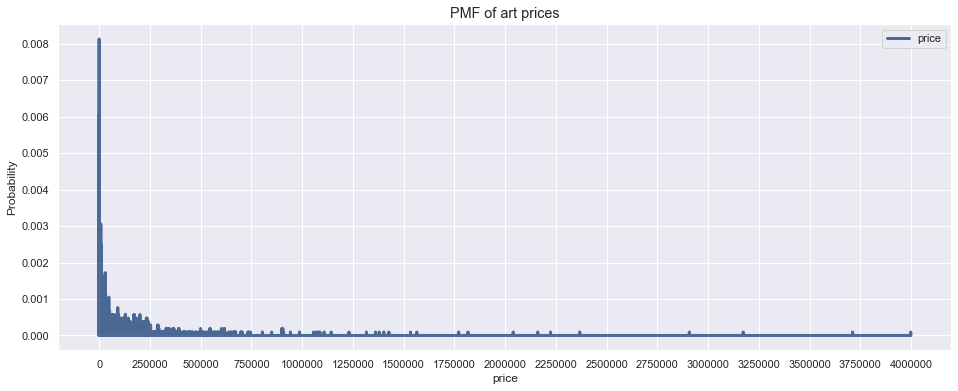

<Figure size 576x432 with 0 Axes>

In [45]:
# Probability Mass Function:
price_pmf = thinkstats2.Pmf(saffronart_df.winning_bid, label='price')

plt.figure(figsize = (16, 6))
plt.xticks([p for p in range(0, 4250000, 250000)])
plt.title("PMF of art prices", fontsize = 'x-large')
thinkplot.Pmf(price_pmf)
thinkplot.Show(xlabel='price', ylabel='Probability') 

#### Comment:
From the graph above, we see that the prices of most lots are below $250,000. Because there're a lot of values, the Probability Mass Function (PMF) is not a good way to represent the distribution. A better option is the Cumulative Distribution Function (CDF).

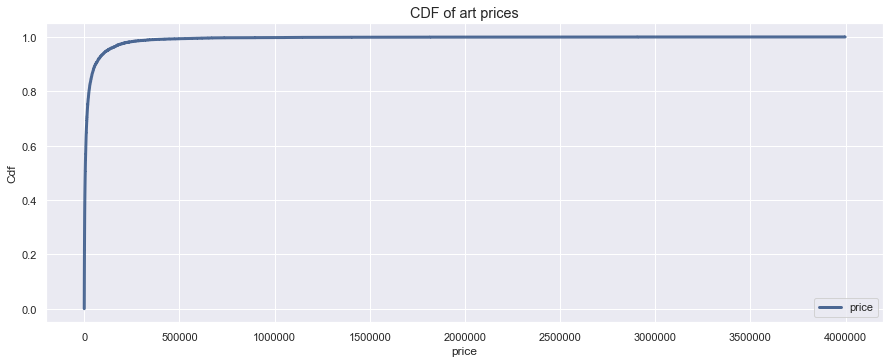

<Figure size 576x432 with 0 Axes>

In [43]:
# Cumulative Distribution Function:

price_cdf = thinkstats2.Cdf(saffronart_df.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.title("CDF of art prices", fontsize = 'x-large')
thinkplot.Cdf(price_cdf)
thinkplot.Show(xlabel='price', ylabel='Cdf') 

#### Comment:
We now compute some summary statistics... 

In [47]:
# Summary Statistics:

mean_price = saffronart_df.winning_bid.mean()
print('The mean price is: ', mean_price) #reformat!

price_std = saffronart_df.winning_bid.std()
print('The standard deviation of prices is: ', price_std)

quartile_1 = saffronart_df.winning_bid.quantile(q=0.25)
print('The first quartile is: ', quartile_1)

median_price = saffronart_df.winning_bid.median()
print('The median price is: ', median_price)

quartile_3 = saffronart_df.winning_bid.quantile(q=0.75)
print('The third quartile is: ', quartile_3)

The mean price is:  28881.16172532517
The standard deviation of prices is:  115183.62219693838
The first quartile is:  1440.0
The median price is:  5160.0
The third quartile is:  18121.0


#### Comment:
The mean price is so much greater than the median... strong effect of outliers (extremely high price)... graph the mean and the median on the CDF...

###### From the shape of the CDF and PMF, we suspect that it's a Pareto distribution. We apply the flowing visual test...

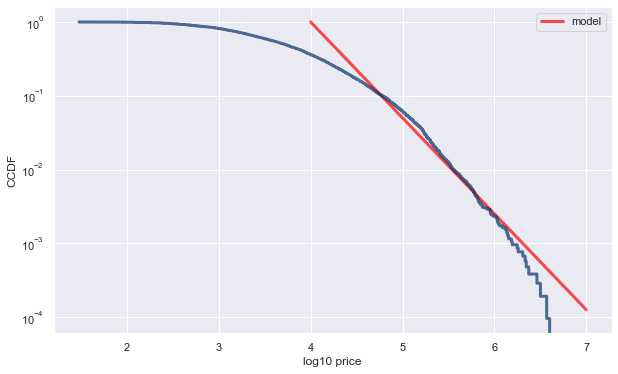

In [7]:
plt.figure(figsize = (10, 6))

log_price = np.log10(saffronart_df.winning_bid)
cdf_log = thinkstats2.Cdf(log_price)

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=10000, alpha=1.3, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='red')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 price', ylabel='CCDF', yscale='log')

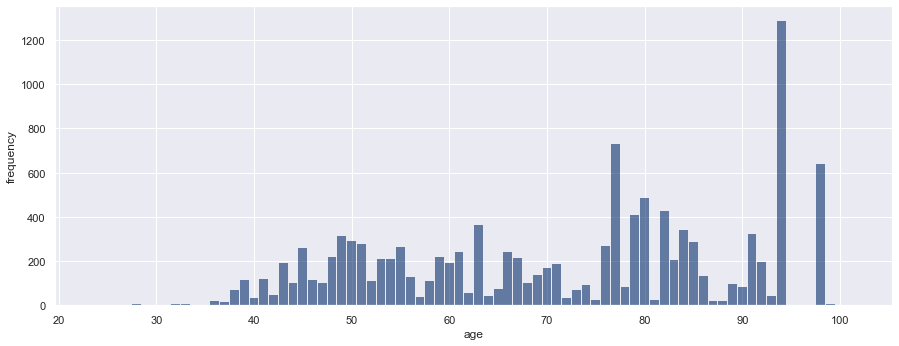

<Figure size 576x432 with 0 Axes>

In [8]:
age_hist = thinkstats2.Hist(saffronart_df.artist_age)

plt.figure(figsize = (15, 5.5))
thinkplot.Hist(age_hist)
thinkplot.Show(xlabel='age', ylabel='frequency') 

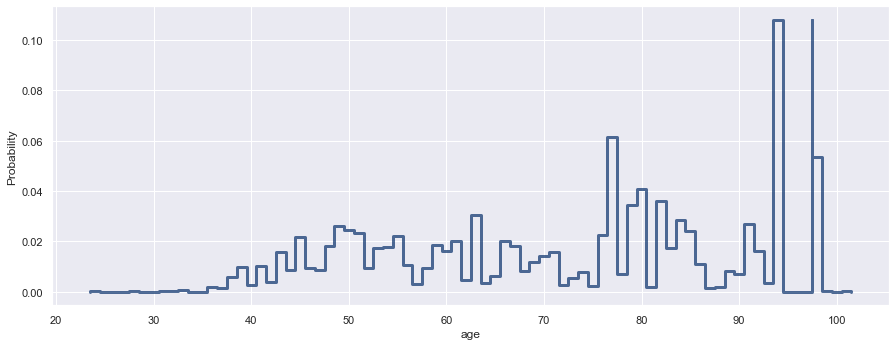

<Figure size 576x432 with 0 Axes>

In [9]:
age_pmf = thinkstats2.Pmf(saffronart_df.artist_age)

plt.figure(figsize = (15, 5.5))
thinkplot.Pmf(age_pmf)
thinkplot.Show(xlabel='age', ylabel='Probability') 